# Grouping

Chapter 9 in Python for Data Analysis demonstrates a variety of methods to analyze data via data aggregation and grouping operations. Those are the focus of this session.  Our overall goal for this session is to do Exploratory Data Analysis, which is essentially looking at and probing our data to learn about the patterns we can discover in them.  Often this can generate a better understanding of problems in the data, as well as revealing relationships that might be worth exploring in more depth.


For this exercise, we will use 2010 US Census data, for all census tracts in Kentucky.  A good starting point for any kind of Census data is the American Fact Finder: 

https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml

The Census Bureau produces several products, the most famous of which is the decennial census, which as its name implies, is a true Census.  There are a limited number of data fields for the whole population (or at least those that the Census workers are able to reach, which is pretty good).  The Census has other products that are surveys, such as the American Community Survey (ACS) which asks more detailed questions on an annual basis from a 1% sample of households.  

In this case, we are working with file DP-1: Profile of General Population and Housing Characteristics: 2010, which is also a part of something called Summary File 1 (SF-1).  It is for the 100% sample.  A data dictionary for selected fields is below.  

In [1]:
import pandas as pd

# skip the second row, which contains descriptions
sf1 = pd.read_csv('data/DEC_10_SF1_combined.csv', skiprows=[1])#skip particular row
#def split_tract(x):
    #return x.split(sep=',')[0]

# make the tract, county and state separate
sf1['tract'] = sf1['GEO.display-label'].apply(lambda x: x.split(sep=',')[0])
sf1['county'] = sf1['GEO.display-label'].apply(lambda x: x.split(sep=',')[1])
sf1['state'] = sf1['GEO.display-label'].apply(lambda x: x.split(sep=',')[2])
#h-housing, p-people
# compute some derived fields
sf1['pct_rent'] = sf1['H4-D004'] / sf1['H4-D001'] * 100
sf1['pct_black'] = sf1['P3-D003'] / sf1['P3-D001'] * 100
sf1['pct_asian'] = sf1['P3-D005'] / sf1['P3-D001'] * 100
sf1['pct_white'] = sf1['P3-D002'] / sf1['P3-D001'] * 100
sf1['pct_hisp'] = sf1['P4-D003'] / sf1['P4-D001'] * 100
sf1['pct_vacant'] = sf1['H5-D001'] / sf1['H1-D001'] * 100
sf1

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,...,H5-D008,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,...,60,Census Tract 9701,Adair County,Kentucky,17.411402,0.810654,0.000000,97.452229,2.142444,16.794872
1,1400000US21001970200,21001970200,"Census Tract 9702, Adair County, Kentucky",1722,1722,1635,41,5,0,0,...,35,Census Tract 9702,Adair County,Kentucky,19.252874,2.380952,0.000000,94.947735,2.613240,25.161290
2,1400000US21001970300,21001970300,"Census Tract 9703, Adair County, Kentucky",3016,3016,2944,6,11,8,0,...,106,Census Tract 9703,Adair County,Kentucky,20.521173,0.198939,0.265252,97.612732,1.856764,15.193370
3,1400000US21001970401,21001970401,"Census Tract 9704.01, Adair County, Kentucky",4070,4070,3716,237,1,16,1,...,109,Census Tract 9704.01,Adair County,Kentucky,37.215909,5.823096,0.393120,91.302211,1.547912,10.795743
4,1400000US21001970402,21001970402,"Census Tract 9704.02, Adair County, Kentucky",4261,4261,3950,180,16,16,3,...,70,Census Tract 9704.02,Adair County,Kentucky,30.911681,4.224360,0.375499,92.701244,1.900962,11.642542
5,1400000US21001970500,21001970500,"Census Tract 9705, Adair County, Kentucky",2457,2457,2402,16,2,5,0,...,104,Census Tract 9705,Adair County,Kentucky,17.972832,0.651201,0.203500,97.761498,0.773301,17.641997
6,1400000US21001970600,21001970600,"Census Tract 9706, Adair County, Kentucky",1403,1403,1366,9,0,0,0,...,54,Census Tract 9706,Adair County,Kentucky,16.920474,0.641483,0.000000,97.362794,1.282965,13.848397
7,1400000US21003920100,21003920100,"Census Tract 9201, Allen County, Kentucky",3185,3185,3114,16,8,4,0,...,96,Census Tract 9201,Allen County,Kentucky,15.139752,0.502355,0.125589,97.770801,1.098901,27.559055
8,1400000US21003920200,21003920200,"Census Tract 9202, Allen County, Kentucky",2703,2703,2645,6,11,8,0,...,53,Census Tract 9202,Allen County,Kentucky,15.276273,0.221976,0.295967,97.854236,1.479837,12.178877
9,1400000US21003920300,21003920300,"Census Tract 9203, Allen County, Kentucky",4685,4685,4473,83,19,12,0,...,86,Census Tract 9203,Allen County,Kentucky,34.676186,1.771612,0.256137,95.474920,1.173959,9.254975


In [2]:
sf1['pct_asian']

0       0.000000
1       0.000000
2       0.265252
3       0.393120
4       0.375499
5       0.203500
6       0.000000
7       0.125589
8       0.295967
9       0.256137
10      0.044524
11      0.187500
12      0.060772
13      0.465458
14      0.930752
15      0.328677
16      0.101574
17      0.132450
18      0.258277
19      0.133869
20      0.080128
21      0.640312
22      0.329489
23      0.489396
24      0.456853
25      0.676041
26      0.673741
27      0.425315
28      0.179802
29      0.055448
          ...   
1085    0.108421
1086    0.343028
1087    0.222717
1088    0.642949
1089    0.326744
1090    0.147674
1091    0.060441
1092    0.339111
1093    0.392670
1094    0.076746
1095    0.082136
1096    0.325325
1097    0.668648
1098    1.032764
1099    0.274681
1100    0.169520
1101    0.278232
1102    0.592734
1103    0.084567
1104    0.151592
1105    0.030553
1106    0.048996
1107    0.254453
1108    0.381971
1109    0.573431
1110    0.490647
1111    0.718659
1112    0.6227

## Groupby and Aggregation Operations

Groupby is a powerful method in pandas that follows the split-apply-combine approach to data.  As shown in Figure 9-1 in the context of a sum operation, the data is first split into groups that share the same key values.  Then an operation, in this case a sum, is applied to each group.  Then the results are combined.

The built-in aggregation methods available for groupby operations include:
* count
* sum
* mean
* median
* std, var
* min, max
* first, last

You can also apply your own functions as aggregation methods.

![Groupby Operations](groupby.png "Groupby")

Let's apply this approach to computing total population in each county in our dataset.  We can do this in two steps to help explain what is happening.  First we create a groupby object, using county codes to group all the census blocks in sf1 into groups that share the same county code.

In [3]:
grouped = sf1['P1-D001'].groupby(sf1['county'])#specific column is grouped by column country as key
grouped

Now that we have this grouping object that represents the **split** part of the workflow in the figure above, we can **apply** operations and **combine** the results using methods like sum:

In [4]:
grouped.sum()

county
 Adair County            18656
 Allen County            19956
 Anderson County         21421
 Ballard County           8249
 Barren County           42173
 Bath County             11591
 Bell County             28691
 Boone County           118811
 Bourbon County          19985
 Boyd County             49542
 Boyle County            28432
 Bracken County           8488
 Breathitt County        13878
 Breckinridge County     20059
 Bullitt County          74319
 Butler County           12690
 Caldwell County         12984
 Calloway County         37191
 Campbell County         90336
 Carlisle County          5104
 Carroll County          10811
 Carter County           27720
 Casey County            15955
 Christian County        73955
 Clark County            35613
 Clay County             21730
 Clinton County          10272
 Crittenden County        9315
 Cumberland County        6856
 Daviess County          96656
                         ...  
 Nicholas County          7135
 

We might want to capture the result in a DataFrame if we want to use it in other processing, like merging the results to the original DataFrame.

In [5]:
county_pop = sf1['P1-D001'].groupby(sf1['county']).sum().to_frame(name='county_population')
county_pop

,county_population
county,
Adair County,18656
Allen County,19956
Anderson County,21421
Ballard County,8249
Barren County,42173
Bath County,11591
Bell County,28691
Boone County,118811
Bourbon County,19985


Here we merge the county total population with sf1 and create a new DataFrame.

In [6]:
sf2 = pd.merge(sf1,county_pop, left_on='county', right_index=True)
#sf2[:5]

sf2.head()#county_pop["Woodford County"]

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,...,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant,county_population
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,...,Census Tract 9701,Adair County,Kentucky,17.411402,0.810654,0.000000,97.452229,2.142444,16.794872,18656
1,1400000US21001970200,21001970200,"Census Tract 9702, Adair County, Kentucky",1722,1722,1635,41,5,0,0,...,Census Tract 9702,Adair County,Kentucky,19.252874,2.380952,0.000000,94.947735,2.613240,25.161290,18656
2,1400000US21001970300,21001970300,"Census Tract 9703, Adair County, Kentucky",3016,3016,2944,6,11,8,0,...,Census Tract 9703,Adair County,Kentucky,20.521173,0.198939,0.265252,97.612732,1.856764,15.193370,18656
3,1400000US21001970401,21001970401,"Census Tract 9704.01, Adair County, Kentucky",4070,4070,3716,237,1,16,1,...,Census Tract 9704.01,Adair County,Kentucky,37.215909,5.823096,0.393120,91.302211,1.547912,10.795743,18656
4,1400000US21001970402,21001970402,"Census Tract 9704.02, Adair County, Kentucky",4261,4261,3950,180,16,16,3,...,Census Tract 9704.02,Adair County,Kentucky,30.911681,4.224360,0.375499,92.701244,1.900962,11.642542,18656


## Transforming Data with Groupby

In some cases you may want to apply a function to your data, by group.  An example would be to normalize a column by a mean of each group.  Say we wanted to subtract the mean population density of each county from the population density of each census block. We could write a function to subtract the mean from each value, and then use the transform operation to apply this to each group:

In [7]:
#applying some method, as for example normalizing
def demean(arr):
    return arr - arr.mean()

Now we can apply this tranformation to columns in our dataframe.  As examples, let's 'demean' the pct_black and pct_rent columns, subtracting the county-wide mean of these values from the tract-specific values, so that the result is transformed to have a mean of zero within each county.

To check the results, we print the means per county, then the original values for the first 5 rows, then the transformed results.  The transformed results we should be able to calculate by subtracting the appropriate county mean from the tract value.

In [8]:
normalized = sf1[['pct_black', 'pct_rent']].groupby(sf1['county']).transform(demean)
print(sf1[['pct_black', 'pct_rent']].groupby(sf1['county']).mean())
print(sf1[['county','pct_black', 'pct_rent']][:5])
print(normalized[:5])

                      pct_black   pct_rent
county                                    
 Adair County          2.104384  22.886621
 Allen County          0.716792  22.312658
 Anderson County       1.419188  20.908477
 Ballard County        2.690326  21.350937
 Barren County         3.385357  29.982273
 Bath County           1.719977  23.865098
 Bell County           2.017470  32.080953
 Boone County          2.362180  24.779530
 Bourbon County        4.863221  33.604963
 Boyd County           2.690429  33.766804
 Boyle County          7.501400  33.987453
 Bracken County        0.319829  24.755274
 Breathitt County      0.291431  20.408091
 Breckinridge County   1.492590  18.524204
 Bullitt County        0.582663  18.852640
 Butler County         0.293354  20.702463
 Caldwell County       4.372987  22.422207
 Calloway County       4.146136  37.944503
 Campbell County       3.106286  34.861471
 Carlisle County       0.752688  17.877812
 Carroll County        1.184510  31.659932
 Carter Cou

We can merge these transformed results on to the original DataFrame, and check the means of the original variables and the tranformed ones.  The transformed ones should be arbitrarily close to zero.

In [9]:
sf2 = pd.merge(sf1,normalized, left_index=True, right_index=True)#default is inner

sf2.groupby('county')[['pct_black_x', 'pct_black_y', 'pct_rent_x', 'pct_rent_y']].mean()

,pct_black_x,pct_black_y,pct_rent_x,pct_rent_y
county,,,,
Adair County,2.104384,-2.854859e-16,22.886621,-2.030122e-15
Allen County,0.716792,-5.551115e-17,22.312658,-3.256654e-15
Anderson County,1.419188,8.881784e-17,20.908477,7.105427e-16
Ballard County,2.690326,1.480297e-16,21.350937,0.000000e+00
Barren County,3.385357,0.000000e+00,29.982273,4.618528e-15
Bath County,1.719977,0.000000e+00,23.865098,-1.184238e-15
Bell County,2.017470,4.687608e-16,32.080953,-3.947460e-15
Boone County,2.362180,3.595008e-16,24.779530,-1.184238e-15
Bourbon County,4.863221,1.480297e-16,33.604963,0.000000e+00


Apply is a method we have learned previously, which allows us to apply a function to each row in a DataFrame.  We can also combine apply with groupby to apply functions based on group membership.  For example, the function 'top' sorts an array and selects the top n rows from it.  We provide some defaults for the arguments of how many rows, and the column to use for the selection:

In [10]:
def top(df, n=5, column='pct_rent'):
    return df.sort_values(by=column, ascending=False).head(n)

Using this on the full dataset and setting the number of rows and the column to get the top values for, in this case using pct_rent to override the default argument, we get the top 10 tracts in the region in terms of percentage rental.

In [11]:
top(sf1, n=10, column='pct_rent')

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,...,H5-D008,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant
255,1400000US21061980100,21061980100,"Census Tract 9801, Edmonson County, Kentucky",8,8,8,0,0,0,0,...,0,Census Tract 9801,Edmonson County,Kentucky,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000
508,1400000US21111003000,21111003000,"Census Tract 30, Jefferson County, Kentucky",3565,3565,258,3187,15,1,16,...,7,Census Tract 30,Jefferson County,Kentucky,99.768697,89.396914,0.028050,7.237027,1.290323,7.883523
200,1400000US21047201501,21047201501,"Census Tract 2015.01, Christian County, Kentucky",5315,5315,3580,982,64,47,81,...,8,Census Tract 2015.01,Christian County,Kentucky,99.698568,18.476011,0.884290,67.356538,14.995296,7.072829
415,1400000US21093000202,21093000202,"Census Tract 2.02, Hardin County, Kentucky",4514,4514,3053,863,45,78,20,...,21,Census Tract 2.02,Hardin County,Kentucky,99.679230,19.118299,1.727957,67.634027,14.842712,5.957768
872,1400000US21163970200,21163970200,"Census Tract 9702, Meade County, Kentucky",2683,2683,1916,414,41,30,15,...,161,Census Tract 9702,Meade County,Kentucky,99.270960,15.430488,1.118151,71.412598,15.803205,32.980456
201,1400000US21047201502,21047201502,"Census Tract 2015.02, Christian County, Kentucky",4527,4527,3055,740,45,61,84,...,6,Census Tract 2015.02,Christian County,Kentucky,98.896435,16.346366,1.347471,67.483985,18.003093,6.507937
414,1400000US21093000201,21093000201,"Census Tract 2.01, Hardin County, Kentucky",1409,1409,1150,153,9,19,6,...,60,Census Tract 2.01,Hardin County,Kentucky,98.620690,10.858765,1.348474,81.618169,10.432931,28.571429
833,1400000US21151010500,21151010500,"Census Tract 105, Madison County, Kentucky",4182,4182,3699,330,11,56,6,...,7,Census Tract 105,Madison County,Kentucky,96.078431,7.890961,1.339072,88.450502,1.673840,8.602151
270,1400000US21067000801,21067000801,"Census Tract 8.01, Fayette County, Kentucky",4094,4094,3255,385,6,356,2,...,13,Census Tract 8.01,Fayette County,Kentucky,95.617530,9.404006,8.695652,79.506595,2.002931,36.775819
142,1400000US21037050100,21037050100,"Census Tract 501, Campbell County, Kentucky",1733,1733,1197,368,1,43,0,...,11,Census Tract 501,Campbell County,Kentucky,94.527363,21.234853,2.481246,69.070975,3.693018,7.903780


Below we apply this with groupby and use the defaults for n and column, and it applies the function within each county and concatenates the results, producing the top 5 blocks on pop_sqmi for each county in the region.

In [12]:
sf1.groupby('county').apply(top)

GEO.id      GEO.id2  \
county                                                       
 Adair County      3     1400000US21001970401  21001970401   
                   4     1400000US21001970402  21001970402   
                   2     1400000US21001970300  21001970300   
                   1     1400000US21001970200  21001970200   
                   5     1400000US21001970500  21001970500   
 Allen County      9     1400000US21003920300  21003920300   
                   10    1400000US21003920400  21003920400   
                   12    1400000US21003920600  21003920600   
                   11    1400000US21003920500  21003920500   
                   8     1400000US21003920200  21003920200   
 Anderson County   14    1400000US21005950201  21005950201   
                   13    1400000US21005950100  21005950100   
                   15    1400000US21005950202  21005950202   
                   17    1400000US21005950400  21005950400   
                   16    1400000US21005950300  21005950300   
 Ballard County    19    1400000US21007950200  21007950200   
                   18    1400000US21007950100  21007950100   
                   20    1400000US21007950300  21007950300   
 Barren County     24    1400000US21009950400  21009950400   
                   26    1400000US21009950600  21009950600   
                   22    1400000US21009950200  21009950200   
                   25    1400000US21009950500  21009950500   
                   23    1400000US21009950300  21009950300   
 Bath County       32    1400000US21011970200  21011970200   
                   31    1400000US21011970100  21011970100   
                   33    1400000US21011970300  21011970300   
 Bell County       39    1400000US21013960600  21013960600   
                   40    1400000US21013960700  21013960700   
                   38    1400000US21013960500  21013960500   
                   35    1400000US21013960200  21013960200   
...                                       ...          ...   
 Union County      1057  1400000US21225950100  21225950100   
 Warren County     1061  1400000US21227010100  21227010100   
                   1064  1400000US21227010400  21227010400   
                   1062  1400000US21227010200  21227010200   
                   1073  1400000US21227011001  21227011001   
                   1063  1400000US21227010300  21227010300   
 Washington County 1086  1400000US21229930200  21229930200   
                   1087  1400000US21229930300  21229930300   
                   1085  1400000US21229930100  21229930100   
 Wayne County      1090  1400000US21231920300  21231920300   
                   1089  1400000US21231920200  21231920200   
                   1091  1400000US21231920400  21231920400   
                   1088  1400000US21231920100  21231920100   
                   1092  1400000US21231920700  21231920700   
 Webster County    1096  1400000US21233960400  21233960400   
                   1093  1400000US21233960100  21233960100   
                   1095  1400000US21233960300  21233960300   
                   1094  1400000US21233960200  21233960200   
 Whitley County    1102  1400000US21235920600  21235920600   
                   1098  1400000US21235920200  21235920200   
                   1097  1400000US21235920100  21235920100   
                   1101  1400000US21235920500  21235920500   
                   1103  1400000US21235920700  21235920700   
 Wolfe County      1106  1400000US21237930200  21237930200   
                   1105  1400000US21237930100  21237930100   
 Woodford County   1107  1400000US21239050103  21239050103   
                   1113  1400000US21239050300  21239050300   
                   1108  1400000US21239050104  21239050104   
                   1114  1400000US21239050400  21239050400   
                   1109  1400000US21239050105  21239050105   

                                                       GEO.display-label  \
county                                                  

Here we pass arguments to the function to set n and the column to select the top value from.

In [13]:
sf1.groupby('county').apply(top, n=1, column='P1-D001')#select top within each county

,,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,...,H5-D008,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant
county,,,,,,,,,,,,,,,,,,,,,,
Adair County,4,1400000US21001970402,21001970402,"Census Tract 9704.02, Adair County, Kentucky",4261,4261,3950,180,16,16,3,...,70,Census Tract 9704.02,Adair County,Kentucky,30.911681,4.224360,0.375499,92.701244,1.900962,11.642542
Allen County,9,1400000US21003920300,21003920300,"Census Tract 9203, Allen County, Kentucky",4685,4685,4473,83,19,12,0,...,86,Census Tract 9203,Allen County,Kentucky,34.676186,1.771612,0.256137,95.474920,1.173959,9.254975
Anderson County,13,1400000US21005950100,21005950100,"Census Tract 9501, Anderson County, Kentucky",8164,8164,7647,292,5,38,3,...,103,Census Tract 9501,Anderson County,Kentucky,26.186684,3.576678,0.465458,93.667320,1.641352,8.081991
Ballard County,18,1400000US21007950100,21007950100,"Census Tract 9501, Ballard County, Kentucky",4259,4259,4024,145,8,11,0,...,132,Census Tract 9501,Ballard County,Kentucky,22.140011,3.404555,0.258277,94.482273,0.986147,11.664153
Barren County,26,1400000US21009950600,21009950600,"Census Tract 9506, Barren County, Kentucky",5937,5937,5331,299,11,40,10,...,95,Census Tract 9506,Barren County,Kentucky,44.142343,5.036214,0.673741,89.792825,2.779181,11.500354
Bath County,32,1400000US21011970200,21011970200,"Census Tract 9702, Bath County, Kentucky",6192,6192,5960,81,20,10,1,...,202,Census Tract 9702,Bath County,Kentucky,26.202119,1.308140,0.161499,96.253230,1.679587,15.115877
Bell County,35,1400000US21013960200,21013960200,"Census Tract 9602, Bell County, Kentucky",5150,5150,5025,69,8,7,2,...,163,Census Tract 9602,Bell County,Kentucky,34.349030,1.339806,0.135922,97.572816,0.485437,10.937500
Boone County,47,1400000US21015070307,21015070307,"Census Tract 703.07, Boone County, Kentucky",11018,11018,10057,336,25,361,1,...,64,Census Tract 703.07,Boone County,Kentucky,11.996843,3.049555,3.276457,91.277909,1.896896,4.617315
Bourbon County,66,1400000US21017030200,21017030200,"Census Tract 302, Bourbon County, Kentucky",6018,6018,5136,432,17,43,0,...,73,Census Tract 302,Bourbon County,Kentucky,44.381107,7.178465,0.714523,85.343968,6.430708,6.934445


## Exploring Correlations in the Data

Pandas provides simple ways of computing correlation coefficients among the columns in your DataFrame.  If you use corr() on a full DF, it will produce a large correlation table.  A bit hard to navigate and you mostly would not be interested in some of these results.

In [14]:
sf1.corr()#correlation between every pair of variable
#-1 for perfectively negative correalte, 0 for no corelation

,GEO.id2,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,P3-D007,P3-D008,...,H5-D005,H5-D006,H5-D007,H5-D008,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant
GEO.id2,1.000000,0.049408,0.049408,0.063873,-0.024147,0.001960,-0.048639,-0.031018,-0.020234,-0.045010,...,0.077670,0.076772,0.010594,0.119563,-0.061820,-0.033330,-0.058690,0.045403,-0.022668,0.043711
P1-D001,0.049408,1.000000,1.000000,0.929708,0.150379,0.479878,0.324468,0.192667,0.240640,0.581058,...,0.308361,0.012925,-0.023479,0.202435,-0.062520,-0.070055,0.136213,0.043546,0.058258,-0.300937
P3-D001,0.049408,1.000000,1.000000,0.929708,0.150379,0.479878,0.324468,0.192667,0.240640,0.581058,...,0.308361,0.012925,-0.023479,0.202435,-0.062520,-0.070055,0.136213,0.043546,0.058258,-0.300937
P3-D002,0.063873,0.929708,0.929708,1.000000,-0.213918,0.363714,0.209791,0.095243,0.057796,0.351332,...,0.376236,0.064984,0.014118,0.236156,-0.257852,-0.391277,0.031737,0.382284,-0.115163,-0.289514
P3-D003,-0.024147,0.150379,0.150379,-0.213918,1.000000,0.252784,0.158195,0.171271,0.325919,0.497941,...,-0.145718,-0.120118,-0.089171,-0.003757,0.464467,0.899663,0.132016,-0.899986,0.302933,0.011119
P3-D004,0.001960,0.479878,0.479878,0.363714,0.252784,1.000000,0.131467,0.463373,0.299747,0.565977,...,0.057503,0.000613,-0.035805,0.090925,0.184507,0.114453,0.060946,-0.170683,0.299351,-0.015777
P3-D005,-0.048639,0.324468,0.324468,0.209791,0.158195,0.131467,1.000000,0.176404,0.160199,0.399051,...,-0.082495,-0.075145,-0.105767,-0.302912,0.163496,0.054982,0.923845,-0.172315,0.178430,-0.222993
P3-D006,-0.031018,0.192667,0.192667,0.095243,0.171271,0.463373,0.176404,1.000000,0.281407,0.523912,...,-0.069520,-0.049845,-0.029479,-0.106864,0.255751,0.099153,0.155861,-0.174929,0.339602,-0.039314
P3-D007,-0.020234,0.240640,0.240640,0.057796,0.325919,0.299747,0.160199,0.281407,1.000000,0.504998,...,-0.108742,-0.086525,-0.017210,-0.124005,0.305578,0.192686,0.134676,-0.334419,0.843366,-0.086896
P3-D008,-0.045010,0.581058,0.581058,0.351332,0.497941,0.565977,0.399051,0.523912,0.504998,1.000000,...,-0.029011,-0.118407,-0.088460,-0.130512,0.425299,0.307009,0.306124,-0.413328,0.466302,-0.216524


It is easy to compute correlation coeffients for a subset of columns.

In [15]:
sf1[['pct_rent', 'pct_vacant']].corr()

,pct_rent,pct_vacant
pct_rent,1.000000,0.085586
pct_vacant,0.085586,1.000000


And this method can be combined with groupby to compute correlation tables by group.

In [16]:
sf1.groupby('county')[['pct_rent', 'pct_vacant']].corr()

pct_rent  pct_vacant
county                                               
 Adair County        pct_rent    1.000000   -0.613912
                     pct_vacant -0.613912    1.000000
 Allen County        pct_rent    1.000000   -0.620421
                     pct_vacant -0.620421    1.000000
 Anderson County     pct_rent    1.000000   -0.534183
                     pct_vacant -0.534183    1.000000
 Ballard County      pct_rent    1.000000   -0.996551
                     pct_vacant -0.996551    1.000000
 Barren County       pct_rent    1.000000   -0.191198
                     pct_vacant -0.191198    1.000000
 Bath County         pct_rent    1.000000   -0.630852
                     pct_vacant -0.630852    1.000000
 Bell County         pct_rent    1.000000   -0.141065
                     pct_vacant -0.141065    1.000000
 Boone County        pct_rent    1.000000    0.306673
                     pct_vacant  0.306673    1.000000
 Bourbon County      pct_rent    1.000000    0.237854
                     pct_vacant  0.237854    1.000000
 Boyd County         pct_rent    1.000000    0.831605
                     pct_vacant  0.831605    1.000000
 Boyle County        pct_rent    1.000000    0.808447
                     pct_vacant  0.808447    1.000000
 Bracken County      pct_rent    1.000000   -0.784164
                     pct_vacant -0.784164    1.000000
 Breathitt County    pct_rent    1.000000   -0.050207
                     pct_vacant -0.050207    1.000000
 Breckinridge County pct_rent    1.000000   -0.671796
                     pct_vacant -0.671796    1.000000
 Bullitt County      pct_rent    1.000000    0.256408
                     pct_vacant  0.256408    1.000000
...                                   ...         ...
 Shelby County       pct_rent    1.000000    0.650988
                     pct_vacant  0.650988    1.000000
 Simpson County      pct_rent    1.000000    0.484368
                     pct_vacant  0.484368    1.000000
 Spencer County      pct_rent    1.000000    0.944464
                     pct_vacant  0.944464    1.000000
 Taylor County       pct_rent    1.000000   -0.656906
                     pct_vacant -0.656906    1.000000
 Todd County         pct_rent    1.000000   -0.874815
                     pct_vacant -0.874815    1.000000
 Trigg County        pct_rent    1.000000   -0.062984
                     pct_vacant -0.062984    1.000000
 Trimble County      pct_rent    1.000000   -1.000000
                     pct_vacant -1.000000    1.000000
 Union County        pct_rent    1.000000   -0.711274
                     pct_vacant -0.711274    1.000000
 Warren County       pct_rent    1.000000    0.565792
                     pct_vacant  0.565792    1.000000
 Washington County   pct_rent    1.000000   -0.660188
                     pct_vacant -0.660188    1.000000
 Wayne County        pct_rent    1.000000   -0.618131
                     pct_vacant -0.618131    1.000000
 Webster County      pct_rent    1.000000    0.847149
                     pct_vacant  0.847149    1.000000
 Whitley County      pct_rent    1.000000    0.483214
                     pct_vacant  0.483214    1.000000
 Wolfe County        pct_rent    1.000000    1.000000
                     pct_vacant  1.000000    1.000000
 Woodford County     pct_rent    1.000000    0.154547
                     pct_vacant  0.154547    1.000000

[240 rows x 2 columns]

## Your turn to practice:

Count the number of census blocks per county.

Calculate total households per county.

Calculate percent renters by county. (Careful not to calculate the mean percent rental across blocks in a county)

Calculate percent vacant by county.

Calculate mean, min and max vacancy rate (at the block level) by county.

Calculate the 90th percentile of vacancy rate (at the block level) by county.

1.number of census blocks per county

In [17]:
sf1['county'].value_counts()

 Jefferson County     191
 Fayette County        82
 Kenton County         41
 Campbell County       25
 Warren County         24
 Daviess County        23
 Hardin County         22
 Boone County          22
 Christian County      19
 Pike County           19
 Madison County        19
 Bullitt County        18
 McCracken County      17
 Scott County          14
 Pulaski County        14
 Oldham County         14
 Boyd County           13
 Laurel County         13
 Hopkins County        12
 Harlan County         11
 Henderson County      11
 Franklin County       11
 Clark County          10
 Barren County         10
 Floyd County          10
 Graves County          9
 Bell County            9
 Nelson County          9
 Muhlenberg County      9
 Shelby County          9
                     ... 
 Martin County          3
 Carroll County         3
 Washington County      3
 Ballard County         3
 Caldwell County        3
 Carlisle County        3
 Owen County            3
 Metcalfe Co

2. total households per county

In [18]:
total_households = sf1['H3-D001'].groupby(sf1['county']).sum().to_frame(name='total_households')
total_households

,total_households
county,
Adair County,8568
Allen County,9307
Anderson County,9127
Ballard County,3885
Barren County,19188
Bath County,5405
Bell County,13154
Boone County,46154
Bourbon County,8927


3. percent renters by county

In [19]:
#renters occupied per county
county_renters = sf1['H4-D004'].groupby(sf1['county']).sum().to_frame(name='county_renters')
county_renters

,county_renters
county,
Adair County,1860
Allen County,1898
Anderson County,2067
Ballard County,727
Barren County,5449
Bath County,1110
Bell County,4061
Boone County,11049
Bourbon County,2904


In [20]:
#household per county
county_household = sf1['H4-D001'].groupby(sf1['county']).sum().to_frame(name='county_household')
county_household

,county_household
county,
Adair County,7285
Allen County,7848
Anderson County,8369
Ballard County,3397
Barren County,16999
Bath County,4587
Bell County,11787
Boone County,43216
Bourbon County,7976


In [21]:
percent_renters = (county_renters['county_renters'] / county_household['county_household'] * 100).to_frame(name='percent renters by county')
percent_renters

,percent renters by county
county,
Adair County,25.531915
Allen County,24.184506
Anderson County,24.698291
Ballard County,21.401236
Barren County,32.054827
Bath County,24.198823
Bell County,34.453211
Boone County,25.566920
Bourbon County,36.409228


4. percent vacant by county

In [22]:
vacant = sf1['H3-D003'].groupby(sf1['county']).sum().to_frame(name='vacant')
Total_unit = sf1['H3-D001'].groupby(sf1['county']).sum().to_frame(name='total')
percent_vacant = (vacant['vacant'] / Total_unit['total'] * 100).to_frame(name='percent vacant')
percent_vacant

,percent vacant
county,
Adair County,14.974323
Allen County,15.676373
Anderson County,8.305029
Ballard County,12.561133
Barren County,11.408172
Bath County,15.134135
Bell County,10.392276
Boone County,6.365645
Bourbon County,10.653075


5. mean, min and max vacancy rate (at the block level) by county

In [23]:
vacancy_rate = sf1['pct_vacant'].groupby(sf1['county'])
vacancy_rate.mean()

county
 Adair County           15.868316
 Allen County           15.808521
 Anderson County         8.927276
 Ballard County         12.640382
 Barren County          11.444842
 Bath County            14.852074
 Bell County            10.308518
 Boone County            6.499883
 Bourbon County         11.112101
 Boyd County            10.097739
 Boyle County           10.332057
 Bracken County         13.577093
 Breathitt County       11.969659
 Breckinridge County    24.982799
 Bullitt County          5.651071
 Butler County          15.507969
 Caldwell County        14.784313
 Calloway County        14.392385
 Campbell County         9.502310
 Carlisle County        13.221629
 Carroll County         14.217337
 Carter County          13.412155
 Casey County           16.340594
 Christian County       16.249693
 Clark County            9.307550
 Clay County            13.976748
 Clinton County         18.174491
 Crittenden County      18.722653
 Cumberland County      22.529994
 Davies

In [24]:
vacancy_rate.min()

county
 Adair County           10.795743
 Allen County            9.254975
 Anderson County         5.492297
 Ballard County         11.608392
 Barren County           7.457767
 Bath County            13.480392
 Bell County             7.796194
 Boone County            2.615519
 Bourbon County          6.934445
 Boyd County             6.034483
 Boyle County            8.444444
 Bracken County         12.837838
 Breathitt County        9.737828
 Breckinridge County    10.757840
 Bullitt County          2.385108
 Butler County           9.831461
 Caldwell County        12.941644
 Calloway County         6.747066
 Campbell County         4.207758
 Carlisle County        11.868687
 Carroll County         11.903853
 Carter County           7.414171
 Casey County           12.956143
 Christian County        5.515832
 Clark County            3.786342
 Clay County             9.306409
 Clinton County         15.075377
 Crittenden County      13.858040
 Cumberland County      16.812439
 Davies

In [25]:
vacancy_rate.max()

county
 Adair County            25.161290
 Allen County            27.559055
 Anderson County         13.452028
 Ballard County          14.648603
 Barren County           22.975207
 Bath County             15.959953
 Bell County             14.950980
 Boone County            12.572614
 Bourbon County          15.599639
 Boyd County             20.585267
 Boyle County            16.060337
 Bracken County          14.001077
 Breathitt County        14.304291
 Breckinridge County     51.259774
 Bullitt County          10.383944
 Butler County           22.043011
 Caldwell County         16.815920
 Calloway County         28.449096
 Campbell County         17.694805
 Carlisle County         14.794816
 Carroll County          17.506631
 Carter County           17.096336
 Casey County            19.819820
 Christian County       100.000000
 Clark County            13.402062
 Clay County             22.991968
 Clinton County          20.645161
 Crittenden County       24.332344
 Cumberland C

6. 90th percentile of vacancy rate 

In [26]:
vacancy_rate.quantile(.9)

county
 Adair County           20.649714
 Allen County           22.324254
 Anderson County        12.075984
 Ballard County         14.051713
 Barren County          15.985510
 Bath County            15.791138
 Bell County            12.192074
 Boone County            9.911678
 Bourbon County         15.100240
 Boyd County            15.934394
 Boyle County           13.402266
 Bracken County         13.979335
 Breathitt County       13.997579
 Breckinridge County    50.773256
 Bullitt County          8.225072
 Butler County          21.444985
 Caldwell County        16.371811
 Calloway County        25.560676
 Campbell County        15.037431
 Carlisle County        14.436130
 Carroll County         16.653610
 Carter County          17.041743
 Casey County           19.082119
 Christian County       18.554342
 Clark County           12.037881
 Clay County            19.639306
 Clinton County         20.276716
 Crittenden County      23.443167
 Cumberland County      27.104038
 Davies

## Some review:

I've included in the data folder a shapefile with the Census geographies.  Can you use it to: 

1. Calculate the population density of each Census tract and county in Kentucky. 
2. Make a choropleth showing the population density.  

Answer 1

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
from shapely.geometry import Point
import pandas as pd

In [28]:
# we can easily read a shapefile
census_data = gp.read_file('data/gz_2010_21_140_00_500k.shp')
census_data

,GEO_ID,STATE,COUNTY,TRACT,NAME,LSAD,CENSUSAREA,geometry
0,1400000US21035010700,21,035,010700,107,Tract,74.333,"POLYGON ((-88.43010642581829 36.500896307, -88..."
1,1400000US21037050100,21,037,050100,501,Tract,0.205,"POLYGON ((-84.50608223252529 39.0950807457157,..."
2,1400000US21037050400,21,037,050400,504,Tract,0.186,"POLYGON ((-84.483948 39.09684, -84.48150699999..."
3,1400000US21037052100,21,037,052100,521,Tract,0.433,"POLYGON ((-84.4935547013056 39.1027204798606, ..."
4,1400000US21037052200,21,037,052200,522,Tract,0.452,"POLYGON ((-84.46285999999999 39.099847, -84.46..."
5,1400000US21043960300,21,043,960300,9603,Tract,70.201,"POLYGON ((-83.147093 38.303398, -83.1455429999..."
6,1400000US21045950500,21,045,950500,9505,Tract,80.060,"POLYGON ((-84.901112 37.116297, -84.916557 37...."
7,1400000US21047200200,21,047,200200,2002,Tract,1.743,"POLYGON ((-87.483228 36.875998, -87.483262 36...."
8,1400000US21047200700,21,047,200700,2007,Tract,3.613,"POLYGON ((-87.53568799999999 36.870476, -87.51..."
9,1400000US21047201501,21,047,201501,2015.01,Tract,0.772,POLYGON ((-87.44485399999999 36.66238999999999...


In [29]:
#population density of each track
sf3 = pd.merge(census_data,sf2, left_on='GEO_ID', right_on='GEO.id')
sf3['population_density']= (sf3['P1-D001'] / sf3['CENSUSAREA']).to_frame(name='population density of track')
sf3['population_density']

0          44.085399
1        8453.658537
2       10112.903226
3        7951.501155
4        5314.159292
5          45.341234
6          31.938546
7        2226.047045
8        1722.668143
9        6884.715026
10       1397.962896
11         39.812296
12         13.694288
13         19.471159
14       3779.797980
15       4076.335878
16       4923.430322
17        386.020372
18         43.832745
19         20.698428
20       6107.355865
21       5137.704918
22       2753.275109
23      11564.971751
24       2086.720867
25       2319.444444
26       7555.989583
27       5069.196429
28       3728.773585
29       4061.718750
            ...     
1085       88.545592
1086       77.196711
1087      104.832510
1088       61.358523
1089       29.692021
1090       37.278351
1091      124.674388
1092       61.777647
1093       28.012193
1094       19.833707
1095     1961.844197
1096      926.217039
1097      327.647248
1098      686.581547
1099      347.420522
1100     1486.175831
1101      525

In [30]:
#population density of each county
area = sf3['CENSUSAREA'].groupby(sf3['county']).sum().to_frame(name='area')
county_pop = sf3['P1-D001'].groupby(sf3['county']).sum().to_frame(name='population')
density_county = (county_pop['population'] / area['area']).to_frame(name='population density of county')
density_county

,population density of county
county,
Adair County,46.032032
Allen County,57.954852
Anderson County,106.132823
Ballard County,33.442931
Barren County,86.501620
Bath County,41.575798
Bell County,79.919220
Boone County,482.265790
Bourbon County,68.980871


Answer 2

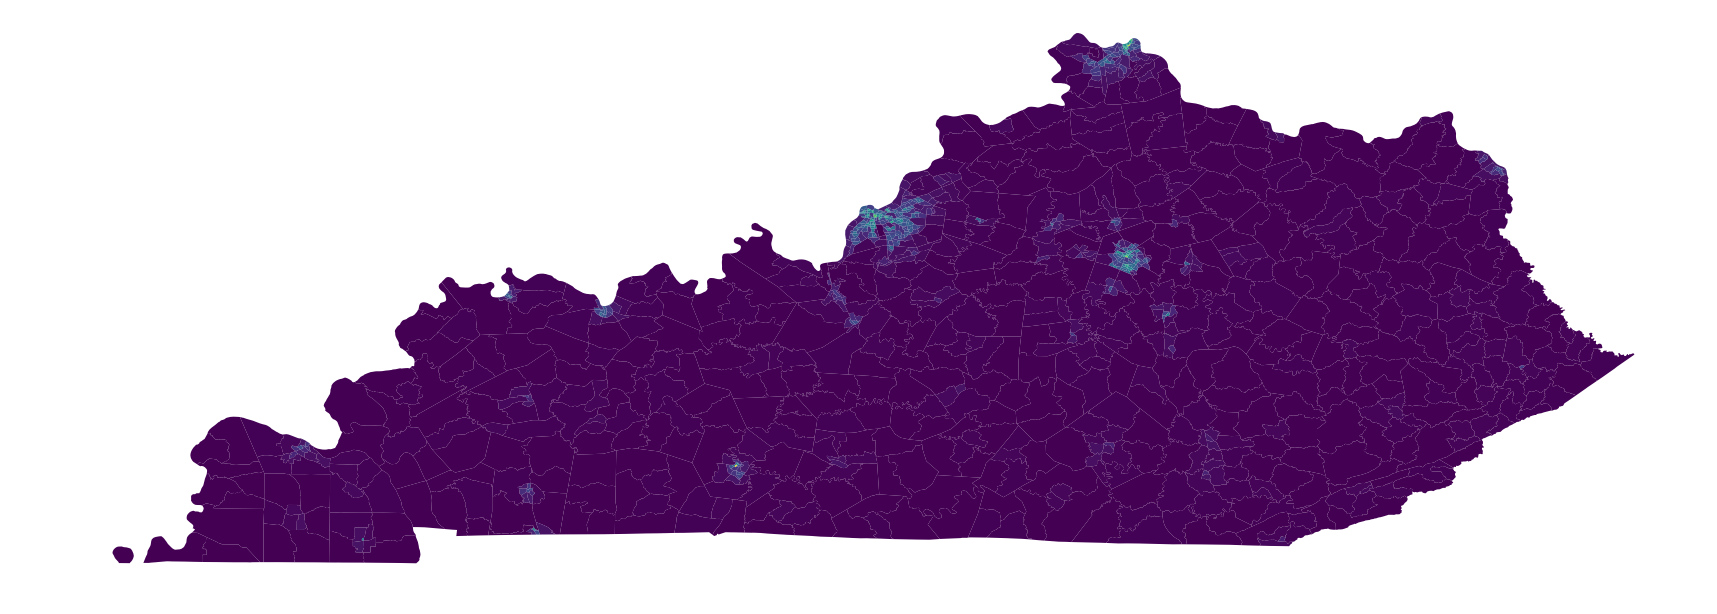

In [31]:
# if we specify a column name, we can make a chloropleth
#Chloropleth maps are maps where the color of each shape is based on the value of an associated variable. 

p=sf3.plot(column='population_density',figsize=(30, 30))
p.set_axis_off()